In [ ]:
"""
Zadanie 2.

Przygotuj chmurę słów (lub wykres kolumnowy dla 50 najczęściej używanych słów) w oparciu o *bag-of-words*. Dla pozyskanych przez Ciebie dokumentów (w języku angielskim). Korpus ma odzwierciedlać pewną dychotomię - konflikt, dyskusję dwóch stron pewnego zjawiska np: zmian klimatycznych, lockdownu, ulubionego sportu (rugby vs. piłka nożna). Mogą to być: teksty tweetów na wybrane tematy (min 1000 tweetów dla każdej strony); dwóch grup artykułów (po 3-5 dla każdej strony, każdy ponad 2000 wyrazów); wypowiedzi dwóch ekspertów czy polityków (po 3-5 dla każdej strony, każdy ponad 2000 wyrazów).

Analizę wykonaj w dwóch wersjach:

1. dwa teksty traktowane są osobno - jako dwa osobne korpusy, przygotuj dwie wizualizacje dla każdej strony osobno.
2. dwa teksty traktowane są jako jeden i wykonaj wizualizację prezentującą:

    - termów charakterystycznych dla każdej ze stron (termy pojawiające się w wypowiedziach jednej strony ale nie pojawiające się w wypowiedziach drugiej strony),
    - termów wspólnych dla dwóch stron (termy pojawiające się w wypowiedziach jednej i drugiej strony jednocześnie).
"""

In [1]:
import twint
import nest_asyncio
import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('SnowballStemmer')

nest_asyncio.apply()

In [ ]:
# c = twint.Config()
# c.Search = '#verstappen'
# c.Limit = 5
# twint.run.Search(c)

In [2]:
#Funkcja pobierająca dane za pomocą biblioteki twint
def get_data(query, limit):
    c = twint.Config()
    c.Search = query
    c.Lang = 'en'
    c.Limit = limit
    c.Pandas = True
    twint.run.Search(c)
    tweets = twint.storage.panda.Tweets_df
    return tweets

In [3]:
#Funkcja oczyszczająca tweety
def cleaned_tweets(text):
    # normalizacja tekstu
    temp = re.sub("\s{2,}", " ", text)
    temp = re.sub("(\r\n|\r|\n)", " ", temp) 
    temp = temp.lower() 
    temp = re.sub("rt", "", temp) 
    temp = re.sub("&amp", "", temp) 
    temp = re.sub("#[a-z,A-Z]*", "", temp)
    temp = re.sub("@\w+", "", temp) 
    temp = re.sub("(f|ht)(tp)([^ ]*)", "", temp) 
    temp = re.sub("http(s?)([^ ]*)", "", temp)
    temp = re.sub("[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]", " ", temp) 
    temp = re.sub("\d", "", temp) 
    temp = re.sub("\s{2,}", " ", temp) 
    temp = temp.strip()
    
    # usuwanie duplikatów ze zbioru
    words_set = set(temp.split())
    words_list = list(words_set)
    
    # tokenizacja
    tokens = nltk.word_tokenize(" ".join(words_list))
    
    # tworzenie listy stop słów
    stop_words = set(stopwords.words('english'))
    
    # stemming
    stemmer = SnowballStemmer("english")
    stemmed_tokens = [stemmer.stem(token) for token in tokens if not token in stop_words]
    
    return stemmed_tokens

In [4]:
# Definicja funkcji generującej chmurę słów
def generate_wordcloud(data):
    wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')
    wordcloud.generate(data)
    plt.figure(figsize = (8, 8), facecolor = 'k', edgecolor = 'k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

In [5]:
# pobranie tweetów na temat Brexitu
brexit_tweets = get_data("Brexit", 1000)
# pobranie tweetów na temat pozostania w UE
remain_tweets = get_data("Remain", 1000)

1640332126473125892 2023-03-27 14:37:09 +0200 <squirma1967> @DavidWa01448973 @LizWebsterLD I would argue Corbyn and Johnston both optically represented views against their beliefs on Brexit.
1640332098283225088 2023-03-27 14:37:02 +0200 <Jackbentwarner> The Ruling party or any other party for that matter, should not be presenting news programmes. Period.  Brexit Broken Britain 2023 🏴‍☠️
1640331942288564225 2023-03-27 14:36:25 +0200 <f_longfield> @cryofdespair @schneiderhome @AaronBastani Starmer's People's Vote madness on reversing Brexit lost the red wall Tom.  More people voted for Corbyn in England in 2017 than voted for Blair. the change with 2019 was going back on Brexit.
1640331925331099650 2023-03-27 14:36:21 +0200 <BrexitRage> @andwarn Ha ha - true :-)
1640331922436923392 2023-03-27 14:36:20 +0200 <shankilllangua1> @derek_alcorn That was the big opportunity of Brexit to be grasped with both hands-hermetically seal their settler statelet from the rest of Ireland and scoff at Der

In [6]:
# oczyszczenie tweetów na temat Brexit
brexit_cleaned_tweets = [cleaned_tweets(tweet) for tweet in brexit_tweets["tweet"]]
# oczyszczenie tweetów na temat Remain
remain_cleaned_tweets = [cleaned_tweets(tweet) for tweet in remain_tweets["tweet"]]

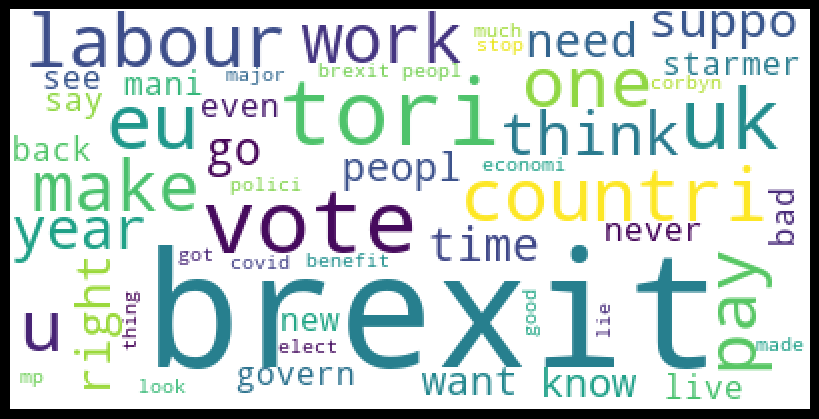

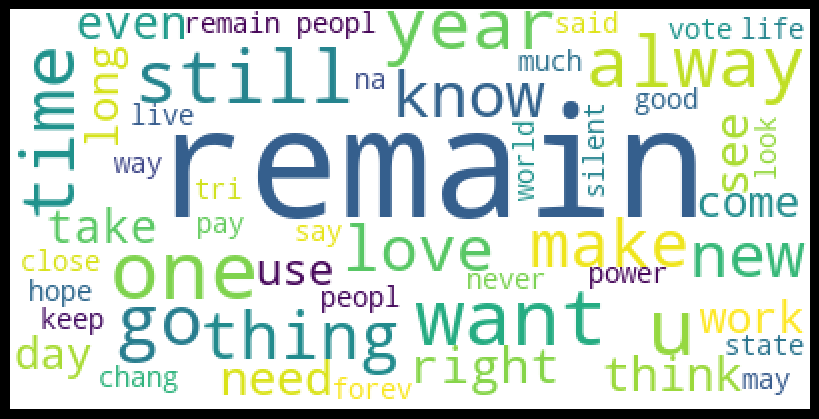

In [7]:
# stworzenie jednego tekstu na temat Brexit
brexit_text = " ".join([" ".join(tweet) for tweet in brexit_cleaned_tweets])
# stworzenie jednego tekstu na temat Remain
remain_text = " ".join([" ".join(tweet) for tweet in remain_cleaned_tweets])

# generowanie chmur słów
generate_wordcloud(brexit_text) # chmura słów dla Brexit
generate_wordcloud(remain_text) # chmura słów dla Remain

In [8]:
#Funkcja umożliwiająca liczenie słów
def count_words(text):
    word_counts = {}
    for tweet in text:
        for word in tweet:
            if word not in word_counts:
                word_counts[word] = 1
            else:
                word_counts[word] += 1
    return word_counts

        Word  Count
7     brexit    784
73         ’    248
332     tori    107
21      vote    101
122       uk     99
121       eu     87
32     peopl     77
4      would     72
139  countri     65
13       pay     64
519   labour     64
97       get     62
117      one     60
71      make     58
442     like     57
395     work     56
687    think     55
235     year     52
81        us     51
300      say     51
563    right     49
26        go     46
38      time     45
316    suppo     45
656     need     44
199     want     42
734   govern     41
196     know     41
27   starmer     39
20      back     37
174      see     36
311     mani     36
923     live     35
504    never     35
792      bad     34
3     corbyn     34
285     even     34
516    elect     33
449    covid     32
236     much     32
205      lie     31
221  benefit     31
182   polici     31
324     stop     30
216     done     30
113        “     29
220      got     29
116        ”     29
569     look     28


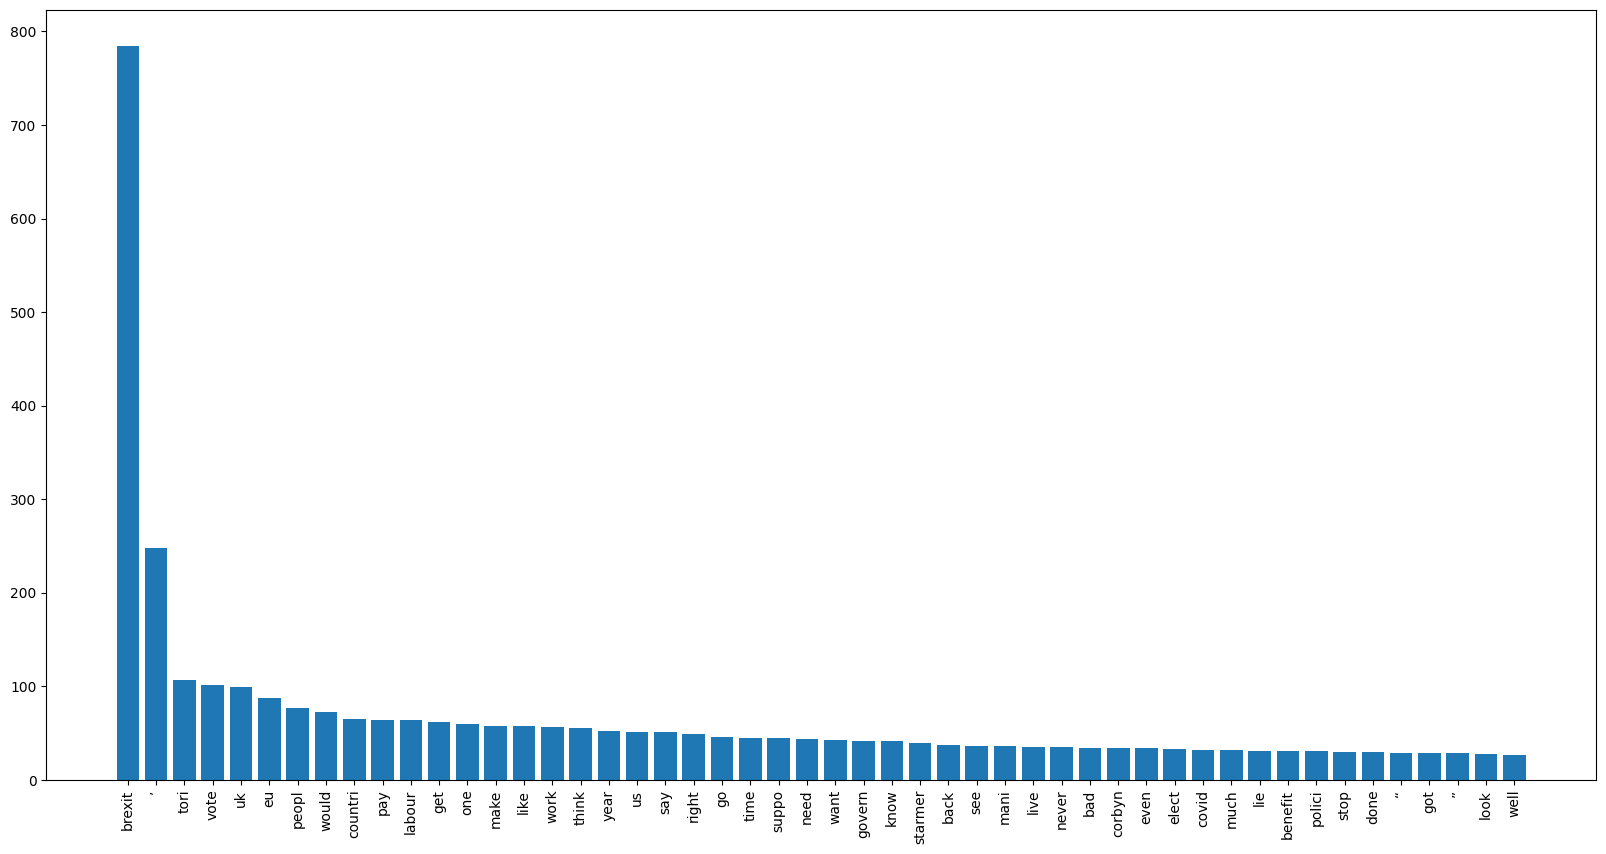

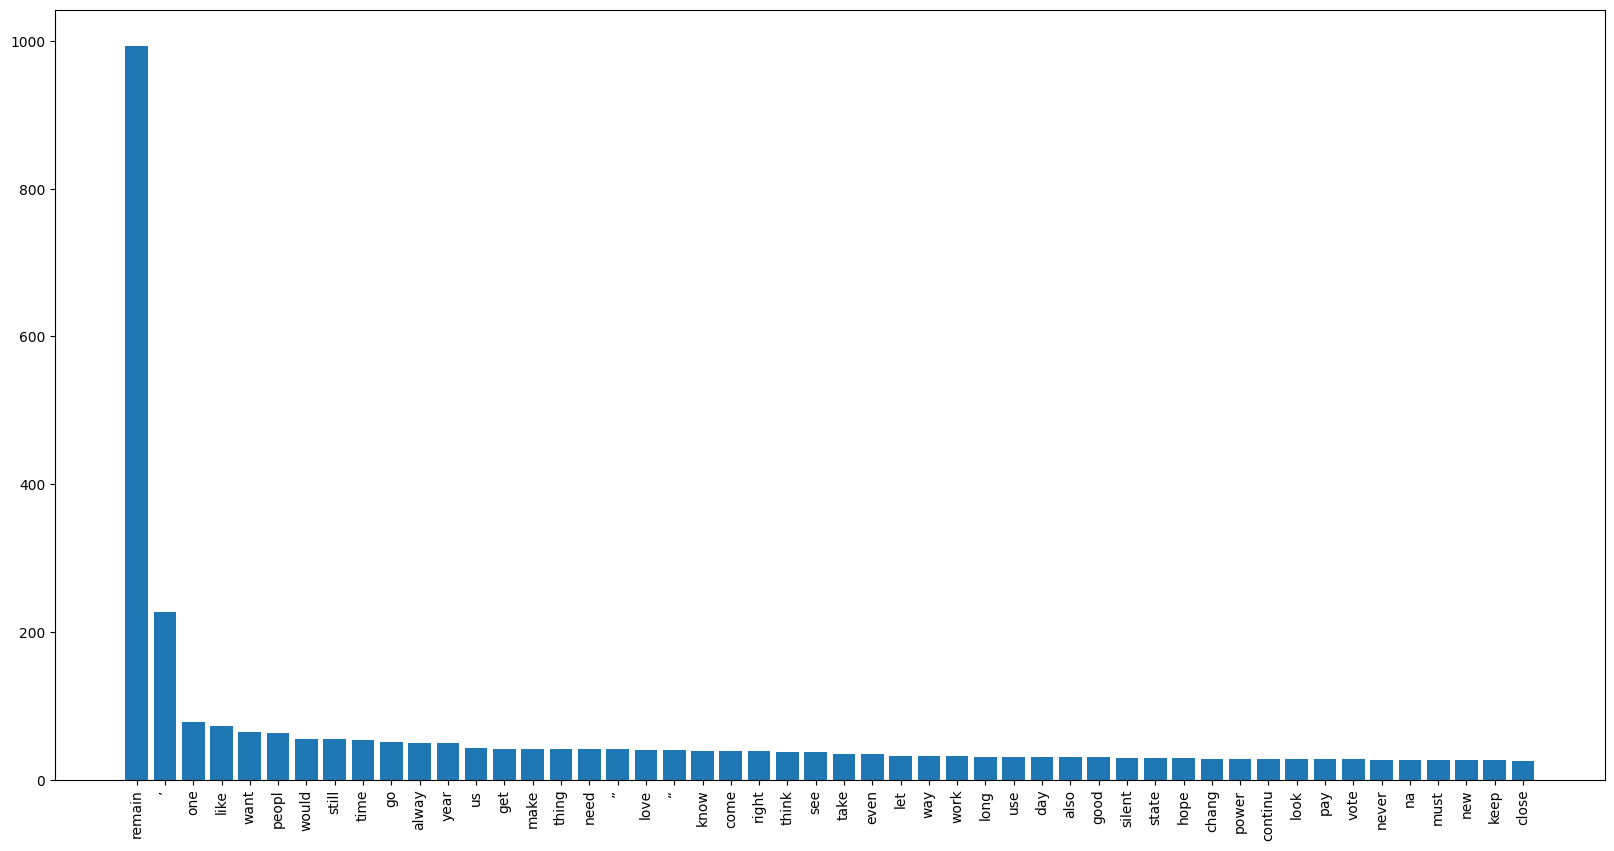

In [9]:
# policzenie słów dla Brexit
brexit_word_counts = count_words(brexit_cleaned_tweets)
# policzenie słów dla Remain
remain_word_counts = count_words(remain_cleaned_tweets)

# wyświetlenie 50 najczęściej używanych słów dla Brexit
brexit_top_50 = pd.DataFrame(list(brexit_word_counts.items()),columns = ['Word','Count']).sort_values(by=['Count'], ascending=False).head(50)
print(brexit_top_50)

# wyświetlenie 50 najczęściej używanych słów dla Remain
remain_top_50 = pd.DataFrame(list(remain_word_counts.items()),columns = ['Word','Count']).sort_values(by=['Count'], ascending=False).head(50)
print(remain_top_50)

# wykres kolumnowy dla 50 najczęściej używanych słów dla Brexit
plt.figure(figsize=[20,10])
plt.bar(brexit_top_50["Word"], brexit_top_50["Count"])
plt.xticks(rotation=90)
plt.show()

# wykres kolumnowy dla 50 najczęściej używanych słów dla Remain
plt.figure(figsize=[20,10])
plt.bar(remain_top_50["Word"], remain_top_50["Count"])
plt.xticks(rotation=90)
plt.show()